In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import seaborn #frequently imported as sns!
#import random 

### If you encounter "ModuleNotFoundError: No module named XYZ", then go to a terminal and "pip install XYZ"

#### Histograms

Histograms are commonly used to display frequencies of variables, grouping them into bins of different sizes if necessary (suitable for continuous variables)

- many packages offer alternatives

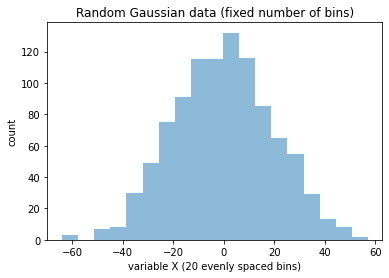

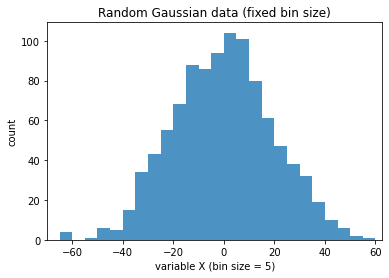

In [2]:
# https://stackoverflow.com/questions/24809757/how-to-make-a-histogram-from-a-list-of-data-and-plot-it-with-matplotlib


data = np.random.normal(0, 20, 1000) 

############ Fix the number of bins #################
bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   20) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed number of bins)')
plt.xlabel('variable X (20 evenly spaced bins)')
plt.ylabel('count')

plt.show()

############ Fix the size of bins ###################

bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.8)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

#### Bar chart
- ideal for categorical data
- plot one over the other / to the side
- stack the bar charts

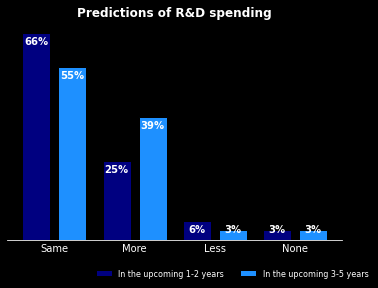

In [3]:
bar_values_next_2_years = [66, 25, 6, 3]
bar_values_next_5_years = [55, 39, 3, 3]

bar_text = ["Same", "More", "Less", "None"]

# https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
# https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

width = .35
offcenter = 0.05

def addlabels(x,y, z):
    for i in range(len(x)):
        if y[i] > 5:
            plt.text(i - offcenter, y[i] - 3.5, str(y[i]) + "%", ha = 'center', color = "white", fontweight = "bold")
        else:
            plt.text(i - offcenter, y[i] - .5, str(y[i]) + "%", ha = 'center', color = "white", fontweight = "bold")
    for i in range(len(x)):
        if z[i] > 5:
            plt.text(i + width + offcenter, z[i] - 3.5, str(z[i]) + "%", ha = 'center', color = "white", fontweight = "bold")
        else:
            plt.text(i + width + offcenter, z[i] - .5, str(z[i]) + "%", ha = 'center', color = "white", fontweight = "bold")

plt.style.use('dark_background')
  
fig, ax = plt.subplots()
#p1 = ax.bar(ind,ind)

n = 4
r = np.arange(n)
ax.bar(r - offcenter, bar_values_next_2_years, color = "navy", #(0,0/256,128/256),
        width = width, edgecolor = 'black',
        label ='In the upcoming 1-2 years')
ax.bar(r + width + offcenter, bar_values_next_5_years, color = "dodgerblue",
        width = width, edgecolor = 'black',
        label ='In the upcoming 3-5 years')


plt.title("Predictions of R&D spending", fontweight = "bold")

addlabels(bar_text, bar_values_next_2_years, bar_values_next_5_years)
  
ax.tick_params(axis = 'x', length = 0)
plt.xticks(r + width/2, bar_text)

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

legend = plt.legend(bbox_to_anchor = (1.1, -.1), ncol = 2, prop = {'size': 8})
legend.get_frame().set_linewidth(0.0)
  
plt.show()


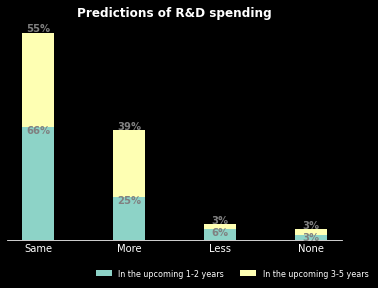

In [4]:
bar_values_next_2_years = [66,25,6,3]
bar_values_next_5_years = [55,39,3,3]

bar_text = ["Same", "More", "Less", "None"]

# https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
# https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

def addlabels(x,y, z):
    for i in range(len(x)):
            plt.text(i, y[i] - 3.5, str(y[i]) + "%", ha = 'center', color = "gray", fontweight = "bold")
    for i in range(len(x)):
            plt.text(i, z[i] + y[i] + .75, str(z[i]) + "%", ha = 'center', color = "gray", fontweight = "bold")

plt.style.use('dark_background')
n=4
r = np.arange(n)
width = 0.35
  
fig, ax = plt.subplots()

ax.bar(bar_text, bar_values_next_2_years, width, label = 'In the upcoming 1-2 years')
ax.bar(bar_text, bar_values_next_5_years, width, bottom = bar_values_next_2_years,
       label='In the upcoming 3-5 years')

plt.title("Predictions of R&D spending", fontweight = "bold")

addlabels(bar_text, bar_values_next_2_years, bar_values_next_5_years)
  
ax.tick_params(axis = 'x',length = 0)
plt.xticks(r, bar_text)

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

legend = plt.legend(bbox_to_anchor = (1.1, -.1), ncol = 2, prop = {'size': 8})
legend.get_frame().set_linewidth(0.0)
  
plt.show()

<AxesSubplot:title={'center':'R&D Predictions'}>

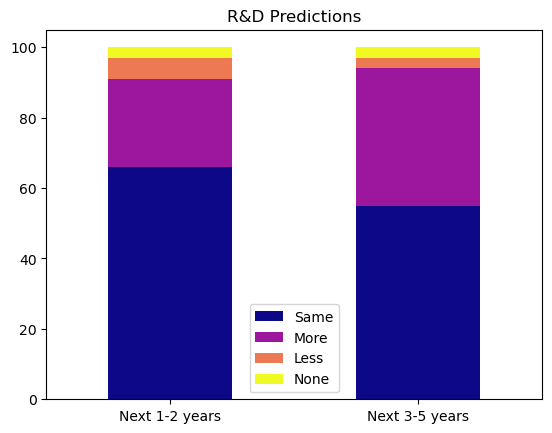

In [5]:
bar_values_next_2_years = [66, 25, 6, 3]
bar_values_next_5_years = [55, 39, 3, 3]

#plt.style.use('fivethirtyeight')
plt.style.use('default')

df = pd.DataFrame({'Same': [66, 55],
                   'More': [25, 39],
                   'Less': [6, 3],
                   'None': [3, 3],
                   },
                  index = ['Next 1-2 years', 'Next 3-5 years'])

#More general solution
our_dict = {}
for i in range(len(bar_values_next_2_years)):
    our_dict[bar_text[i]] = list(zip(bar_values_next_2_years, bar_values_next_5_years))[i]
df2 = pd.DataFrame(our_dict, index = ['Next 1-2 years', 'Next 3-5 years'])
 
 
# create stacked bar chart for monthly temperatures
df2.plot(kind = 'bar', stacked = True, rot = 0, cmap = "plasma", title = "R&D Predictions")


#### Pie chart

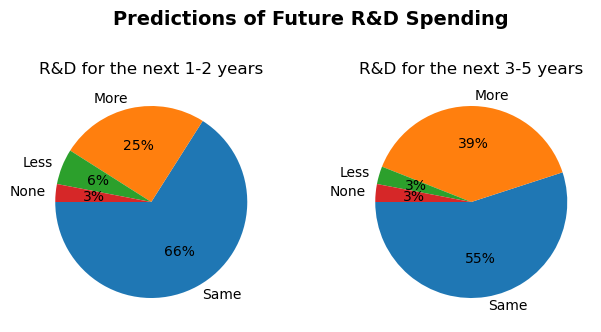

In [6]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
# More advanced version (donuts): https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

values_next_2_years = [66, 25, 6, 3]
values_next_5_years = [55, 39, 3, 3]
text = ["Same", "More", "Less", "None"]

fig = plt.figure()
fig.suptitle("Predictions of Future R&D Spending", y = .65, fontsize = 14, fontweight = "bold") # Placement of main title depends on the layout of the subplots

ax1 = fig.add_axes([0, 0, .5, .5], aspect = 1)
ax1.pie(values_next_2_years, labels = text, autopct = '%.0f%%', startangle = 180) #'%1.2f%%'for two decimals, for a comma separator use the locale package
ax1.set_title('R&D for the next 1-2 years') # Title for subplot 1


ax2 = fig.add_axes([.5, .0, .5, .5], aspect = 1)
ax2.pie(values_next_5_years, labels = text, autopct = '%.0f%%', startangle = 180)
ax2.set_title('R&D for the next 3-5 years')

plt.show()

#### Line chart

Line plots are essential in a Finance professionals toolkit but a number of ways exist to display stock price movements:
- vanilla plt
- plotly express
- plotly graph objects
- and seaborn are just a few of the most popular options out there 

In [7]:
# https://www.w3schools.com/python/matplotlib_line.asp
# https://plotly.com/python/line-charts/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# https://pythoninoffice.com/draw-stock-chart-with-python/
# https://plotly.com/python/figure-labels/

import plotly.graph_objects as go
import yfinance

tsla = yfinance.Ticker('TSLA')
hist = tsla.history(period = '1y')

fig = go.Figure(data = go.Scatter(x = hist.index, y = hist['Close'], mode = 'lines + markers')) # Scatter plot can be used for the stock price
fig.update_layout(
    title = {
        'text': "Tesla Stock Price Development",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    # title="Tesla Stock Price Development",
    # xaxis_title="X Axis Title",
    yaxis_title="Stock Price",
    # legend_title="Legend Title",
    # font=dict(
    #     family="Courier New, monospace",
    #     size=18,
    #     color="RebeccaPurple"
    # )
)

fig.show()

In [8]:
from plotly.subplots import make_subplots

fig2 = make_subplots(specs = [[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x = hist.index, y = hist['Close'], name = 'Price'), secondary_y = True)
fig2.add_trace(go.Bar(x = hist.index, y = hist['Volume'], name = 'Volume'), secondary_y = False)


fig2.update_layout(
    title = {
        'text': "Tesla Stock Price and Volume",
        'y': 0.9,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Volume",
)

fig2.show()

#### Box plots

## Advanced

#### Correlation heatmap (correlogram)

- https://towardsdatascience.com/seaborn-heatmap-for-visualising-data-correlations-66cbef09c1fe
- https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
- https://medium.com/analytics-vidhya/how-to-create-a-stock-correlation-matrix-in-python-4f32f8cb5b50
- https://stackoverflow.com/questions/39409866/correlation-heatmap

In [12]:
import pandas_datareader
from datetime import datetime 

start = datetime(2017, 1, 1)
symbols_list = ['AAPL', 'F', 'TWTR', 'FB', 'AAL', 'AMZN', 'GOOGL', 'GE', 'TSLA', 'IBM', 'PYPL']

symbols=[] #array to store prices
for ticker in symbols_list:     
    r = pandas_datareader.DataReader(ticker, 'yahoo', start)   
    
    r['Symbol'] = ticker     # add a symbol column
    symbols.append(r)

df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]

df_pivot=df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

corr_df = df_pivot.corr(method='pearson')
corr_df.head()


Symbol,AAL,AAPL,AMZN,F,FB,GE,GOOGL,IBM,PYPL,TSLA,TWTR
Symbol,,,,,,,,,,,
AAL,1.000000,-0.789677,-0.801290,-0.022357,0.704476,0.689958,-0.673581,0.671671,-0.571177,-0.675542,-0.601462
AAPL,-0.789677,1.000000,0.858641,0.546843,0.713244,-0.407650,0.948030,-0.357488,0.619495,0.963609,0.702401
AMZN,-0.801290,0.858641,1.000000,0.277368,0.813734,-0.569334,0.847647,-0.553512,0.870954,0.805579,0.837104
F,-0.022357,0.546843,0.277368,1.000000,0.854747,0.256375,0.652519,0.287189,0.158567,0.663401,0.257861
FB,0.704476,0.713244,0.813734,0.854747,1.000000,0.668594,0.884532,-0.198634,0.914695,0.755952,-0.151084


<Figure size 640x480 with 0 Axes>

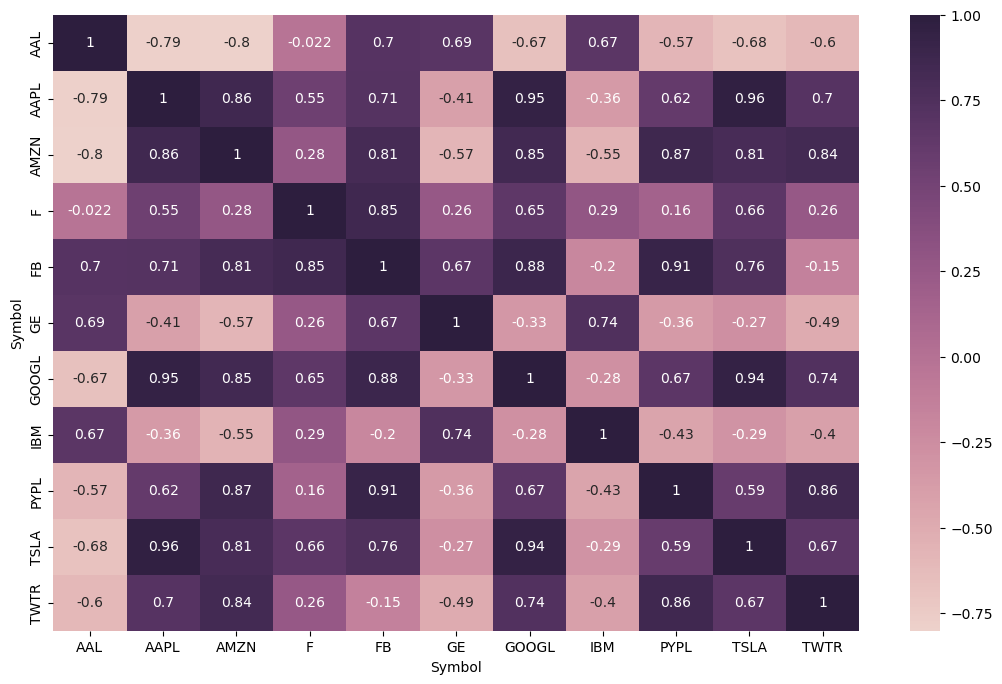

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize = (13, 8))
seaborn.heatmap(corr_df, annot = True, cmap = seaborn.cubehelix_palette(as_cmap=True)) #, cmap='RdYlGn' , 'crest' and many other nice palettes
plt.figure()

#### Treemap

- https://github.com/jmshea/stock_treemap

#### Bubble chart

https://finviz.com/map.ashx